<a href="https://colab.research.google.com/github/msof07/msof07/blob/main/Reto_de_aprendizaje_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PSEUDOCÓDIGO

1. Se toman los datos con factores numéricos de una entidad con una columna independiente (X) y una columna dependiente (y).

2. Se ajustan los datos con el modelo LinearRegression de la librería sklearn

3. Se calcula la pendiente (coeficiente m en mx)

4. Se calcula el término independiente (intercept)

5. Se general la recta para su visualización con la función predict()

### CÓDIGO

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import drive

#### **Conjuntos de datos**

#### Caso 1

Se carga la base de datos

In [3]:
# CASO 1

# Source: https://finance.yahoo.com/quote/%5EIXIC/history/

drive.mount("/content/gdrive")
df_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Diplomado/NDAQ.csv')
df_1

Mounted at /content/gdrive


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-29,28.123333,28.356667,27.700001,28.026667,25.905121,4179600
1,2018-10-30,28.156668,28.646667,27.893333,28.610001,26.444300,3541500
2,2018-10-31,28.813334,29.043333,28.709999,28.903334,26.715431,3480000
3,2018-11-01,28.856667,29.160000,28.646667,29.000000,26.804775,3263400
4,2018-11-02,29.133333,29.290001,28.713333,29.000000,26.804775,2216400
...,...,...,...,...,...,...,...
1253,2023-10-23,50.299999,50.540001,49.770000,49.820000,49.820000,2021700
1254,2023-10-24,50.070000,50.380001,49.119999,49.459999,49.459999,2033700
1255,2023-10-25,49.400002,49.869999,48.919998,49.490002,49.490002,1972200
1256,2023-10-26,49.619999,50.529999,49.619999,49.700001,49.700001,1916600


Aunque los datos están ordenados por fecha, el algoritmo no puede tomar este tipo de formato, por lo que se genera una columna auxiliar que respeta el orden temporal de los datos.

In [15]:
df_1["Order"] = np.arange(len(df_1))
df_1

,Date,Open,High,Low,Close,Adj Close,Volume,Order
0,2018-10-29,28.123333,28.356667,27.700001,28.026667,25.905121,4179600,0
1,2018-10-30,28.156668,28.646667,27.893333,28.610001,26.444300,3541500,1
2,2018-10-31,28.813334,29.043333,28.709999,28.903334,26.715431,3480000,2
3,2018-11-01,28.856667,29.160000,28.646667,29.000000,26.804775,3263400,3
4,2018-11-02,29.133333,29.290001,28.713333,29.000000,26.804775,2216400,4
...,...,...,...,...,...,...,...,...
1253,2023-10-23,50.299999,50.540001,49.770000,49.820000,49.820000,2021700,1253
1254,2023-10-24,50.070000,50.380001,49.119999,49.459999,49.459999,2033700,1254
1255,2023-10-25,49.400002,49.869999,48.919998,49.490002,49.490002,1972200,1255
1256,2023-10-26,49.619999,50.529999,49.619999,49.700001,49.700001,1916600,1256


Se toman únicamente las columnas que se necesitan para alimentar el algoritmo de regresión lineal, que son los datos numéricos de los precios y el "orden temporal"

In [22]:
X1 = np.array(df_1["Order"]).reshape(-1,1)
y1 = df_1["Adj Close"]

Se crea el modelo con la función correspondiente y se imprimen el término independiente y la pendiente.

In [18]:
linear_reg = LinearRegression()

In [26]:
linear_reg.fit(X1,y1)

intercept = linear_reg.intercept_
slope = linear_reg.coef_[0]

print("Intercept (beta_0): ", intercept)
print("Slope (beta_1):" , slope)

Intercept (beta_0):  27.722141076364654
Slope (beta_1): 0.029056641393801416


#### Caso 2

In [70]:
# CASO 2

# SOURCE: https://catalog.data.gov/dataset/mental-health-care-in-the-last-4-weeks

df_2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Diplomado/Mental_Health_Care_in_the_Last_4_Weeks.csv')
df_2

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,22.2,21.7,22.8,21.7 - 22.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,22.6,20.8,24.6,20.8 - 24.6,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,21.8,20.4,23.3,20.4 - 23.3,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,23.2,21.8,24.7,21.8 - 24.7,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,23.5,22.1,25.0,22.1 - 25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,High school diploma or GED,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN
2596,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,Some college/Associate's degree,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN
2597,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,Bachelor's degree or higher,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN
2598,Needed Counseling or Therapy But Did Not Get I...,By Disability status,United States,With disability,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_2["Order"] = np.arange(len(df_2))

In [72]:
X2 = np.array(df_2["Order"]).reshape(-1,1)
y2 = df_2["Value"].fillna(0)

In [73]:
linear_reg.fit(X2,y2)

intercept = linear_reg.intercept_
slope = linear_reg.coef_[0]

print("Intercept (beta_0): ", intercept)
print("Slope (beta_1):" , slope)

Intercept (beta_0):  20.00034690799397
Slope (beta_1): -0.0029138727797035305


#### Caso 3

In [62]:
# CASO 3

# SOURCE: https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002

df_3 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Diplomado/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv')
df_3

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,08/01/2023,08 24 30 45 61,12,4
1,09/01/2023,10 31 42 43 55,8,2
2,05/02/2023,03 15 16 32 41,9,2
3,06/02/2023,03 16 19 36 60,25,2
4,01/03/2023,25 29 33 41 44,18,4
5,02/03/2023,01 04 50 54 59,17,2
6,03/03/2023,08 25 36 39 67,11,4
7,10/03/2023,03 19 32 39 59,24,3
8,04/04/2023,01 37 45 62 64,4,3
9,07/04/2023,21 33 54 61 67,12,3


In [64]:
df_3["Order"] = np.arange(len(df_3))

In [65]:
X3 = np.array(df_3["Order"]).reshape(-1,1)
y3 = df_3["Mega Ball"].fillna(0)

In [66]:
linear_reg.fit(X3,y3)

intercept = linear_reg.intercept_
slope = linear_reg.coef_[0]

print("Intercept (beta_0): ", intercept)
print("Slope (beta_1):" , slope)

Intercept (beta_0):  13.720142602495544
Slope (beta_1): -0.02606951871657754


#### Visualizaciones

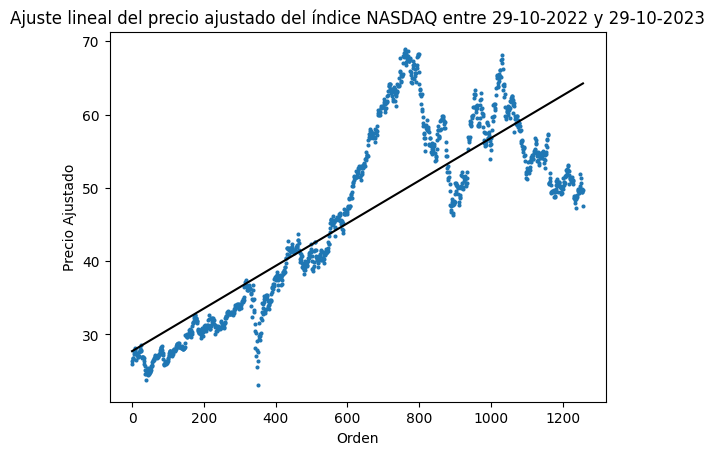

In [33]:
plt.scatter(X1, y1, marker='.', s=15)
plt.plot(X1, linear_reg.predict(X1),color='k')

plt.title("Ajuste lineal del precio ajustado del índice NASDAQ entre 29-10-2022 y 29-10-2023")
plt.xlabel("Orden")
plt.ylabel("Precio Ajustado")


plt.show()

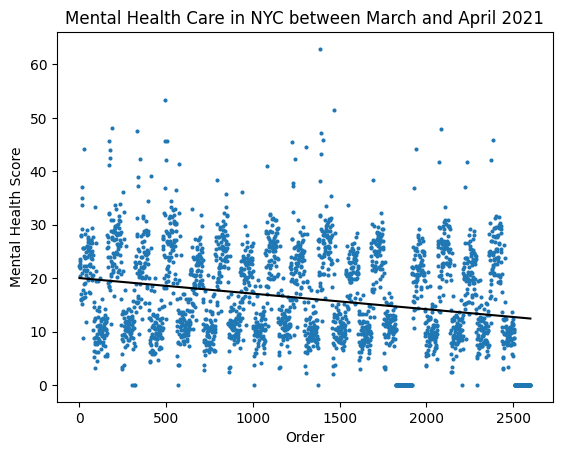

In [74]:
plt.scatter(X2, y2, marker='.', s=15)
plt.plot(X2, linear_reg.predict(X2),color='k')

plt.title("Mental Health Care in NYC between March and April 2021")
plt.xlabel("Order")
plt.ylabel("Mental Health Score")


plt.show()

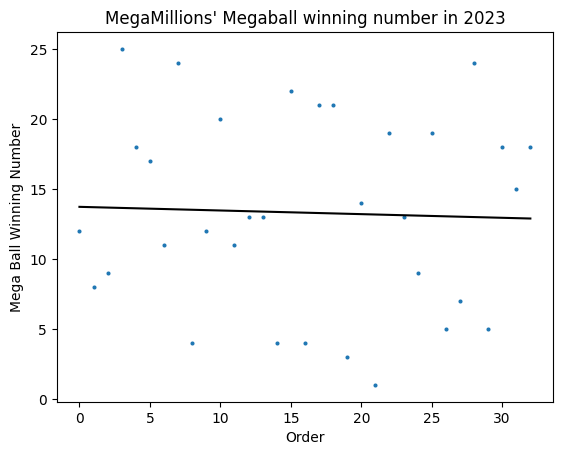

In [68]:
plt.scatter(X3, y3, marker='.', s=15)
plt.plot(X3, linear_reg.predict(X3),color='k')

plt.title("MegaMillions' Megaball winning number in 2023")
plt.xlabel("Order")
plt.ylabel("Mega Ball Winning Number")


plt.show()

### COMPARACIÓN Y CONCLUSIONES

**Caso 1**

En este primer dataset se usó una serie de tiempo del índice de la bolsa de valores NASDAQ. Después de ajustarse una recta y visto contra los valores iniciales se observa que la línea sigue la tendencia de los datos, pero no es un buen predictor de este tipo de datos. Puede indicar correctamente la tendencia que siguen los datos pero queda descartado como un modelo adecuado para describir la trayectoria precisa de los datos de la bolsa.

<br>

**Caso 2**

En el segundo dataset se usó un reporte semanal de la Oficina de Censo de EE.UU. para medir el impacto de los efectos en la salud mental debido a la pandemia de COVID-19 en los hogares estadounidenses a través de una encuesta. Para este caso hay una variable dependiente que es el puntaje total en esta encuesta entre 0-100. Debido al tipo de datos la regresión lineal no es adecuada a este nivel, es necesario desagregar los datos en diferentes categorías. Como hipótesis, es posible que la calificación de la encuesta sí esté directamente relacionada con el pasar del tiempo (eje x) del registro de los datos, pero se están mostrando varias categorías simultáneamente (por estado, sexo, edad, etc) que una vez desagreadas posiblemente muestren una pendiente diferente para cada grupo.

<br>


**Caso 3**
En el último conjunto de datos se tomó el número final de la lotería MegaMillions en Estados Unidos, usualmente se sacan 5 números aleatorios cuya combinación es el número ganador, y finalmente, una bola extra de otro grupo con uno o dos dígitos como las bolas pasadas, esta bola en sí representa un número ganador individual. Teniendo en cuenta que son números completamente aleatorios, es natural que no se haya ajustado al modelo lineal. Este tipo de eventos aleatorios es en cierta medida similar a la naturaleza estocástica del primer caso con los precios de la bolsa, sin embargo en ese caso sí hay más elementos que directamente afectan su movimiento mientras que la lotería es en esencia un evento completamente aleatorio cuya probabilidad va cambiando dependiendo de los números que se vayan sacando de la caja, en el caso de la MegaBall que se toma de una caja completamente diferente y solo se toma una vez la proabilidad de que salga cualquier número es igual y por tanto puramente aleatoria.

<br>

En conclusión, aunque es un modelo simple, la regresión lineal tiene dificultad para predecir o ajustarse en gran medida a muchos problemas de la vida real debido al número de factores que se cruzan en un solo evento. Sin embargo, sus elementos como la pendiente sirven en para poder entender la tendencia en la que se dirigen los datos aunque no logre explicar el fenónemo que los origina.
